In [2]:
# Question 1 (a)
#We will be analysing both csv files to detect if we need to make data ready for further process beforehand.
#Goal: understand variables, missing values, distribution, possible outliers and relationship (visual) to justify regression.

D1 shape: (1000, 2)
         x         y
0  0.00000  6.764052
1  0.01001  5.420177
2  0.02002  6.018778
3  0.03003  7.300953
4  0.04004  6.947638
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None
                 x            y
count  1000.000000  1000.000000
mean      5.000000    14.954743
std       2.891085     5.860585
min       0.000000     2.847411
25%       2.500000     9.826270
50%       5.000000    14.793984
75%       7.500000    20.061104
max      10.000000    26.638234

D2 shape: (1000, 2)
         x         y
0  0.00000  5.555963
1  0.01001  5.916961
2  0.02002  4.613498
3  0.03003  5.166346
4  0.04004  5.312699
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  No

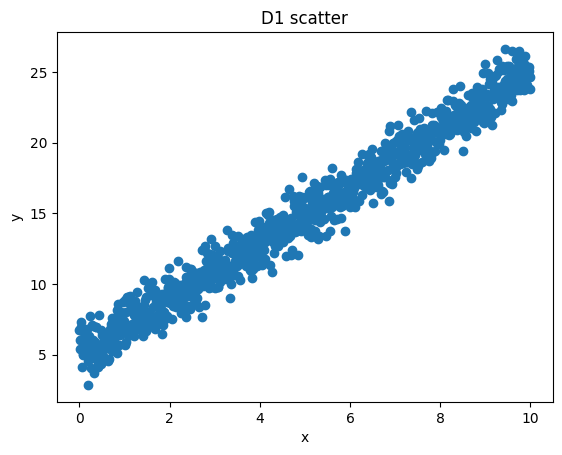

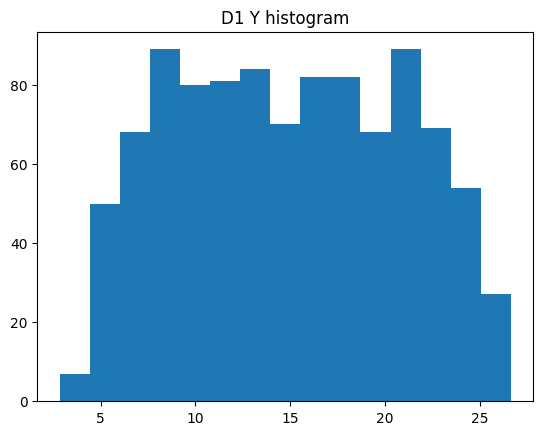

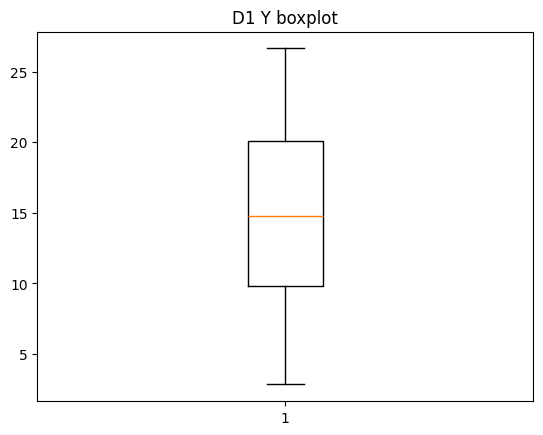

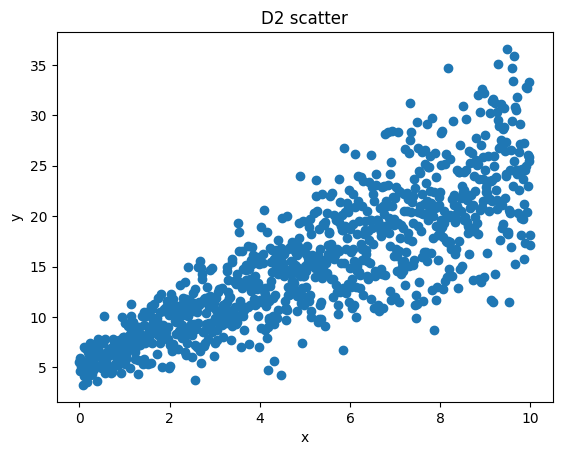

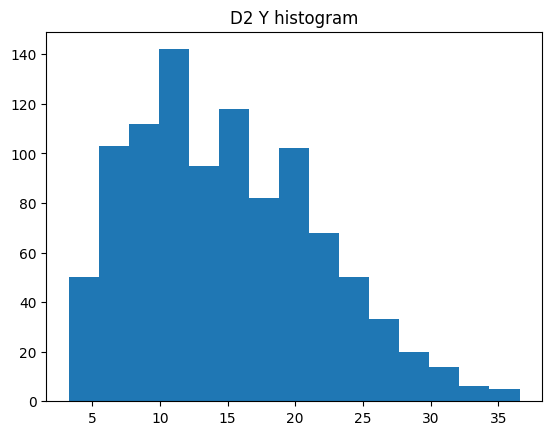

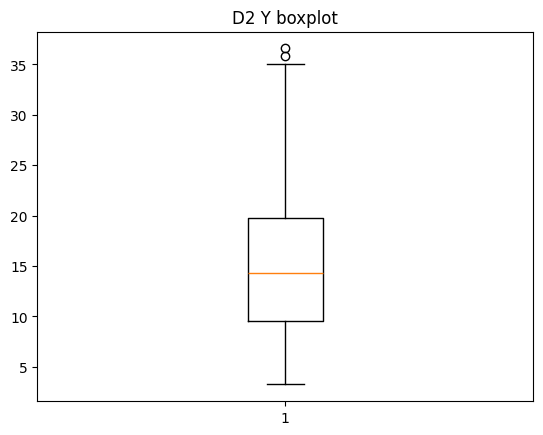

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load
d1 = pd.read_csv('D1.csv')
d2 = pd.read_csv('D2.csv')

# quick inspect
print("D1 shape:", d1.shape)
print(d1.head())
print(d1.info())
print(d1.describe())

print("\nD2 shape:", d2.shape)
print(d2.head())
print(d2.info())
print(d2.describe())

# scatter
plt.scatter(d1.iloc[:,0], d1.iloc[:,1])
plt.xlabel(d1.columns[0]); plt.ylabel(d1.columns[1])
plt.title('D1 scatter')
plt.show()
plt.hist(d1.iloc[:,1], bins=15); plt.title('D1 Y histogram'); plt.show()
plt.boxplot(d1.iloc[:,1]); plt.title('D1 Y boxplot'); plt.show()

# Repeat for d2
plt.scatter(d2.iloc[:,0], d2.iloc[:,1])
plt.xlabel(d2.columns[0]); plt.ylabel(d2.columns[1])
plt.title('D2 scatter')
plt.show()
plt.hist(d2.iloc[:,1], bins=15); plt.title('D2 Y histogram'); plt.show()
plt.boxplot(d2.iloc[:,1]); plt.title('D2 Y boxplot'); plt.show()


# #Analysis as per generated plots:
#
# *****Dataset D1
#
# **Scatter Plot (x vs y)
# # A clear and strong linear relationship is visible.
# # Points lie close to a straight upward trend.
# # Very low noise.
#
# **Histogram of y
# # Distribution is roughly symmetric.
# # Spread is moderate and there is no strong skew.
#
# **Boxplot of y
# # No significant outliers are observed.
# # Middle 50% of the data lies in a compact range.
#
# **Conclusion for D1
# # D1 appears clean, with a strong linear pattern, no missing values, and no major outliers.
# #It is well-suited for linear regression without additional preprocessing.
#
# *****Dataset D2
# **Scatter Plot (x vs y)
# # A positive trend exists, but the variance around the trend is much higher than in D1.
# # The spread increases as x increases (heteroscedasticity).
#
# **Histogram of y
# # Wider spread compared to D1.
# # Slight positive skew is visible.
#
# **Boxplot of y
# # Larger interquartile range.
# # Some high values, though not extreme outliers.
#
# **Conclusion for D2
# # D2 shows a linear trend but with higher noise and variability.
# #It contains mild skewness and heteroscedasticity.
# #The dataset is usable for regression, but model performance will be weaker, and transformations may improve fit.

In [ ]:
#Question 1 (b)

#Compute: coefficients (slope & intercept), MSE, R², and plot data + regression line.

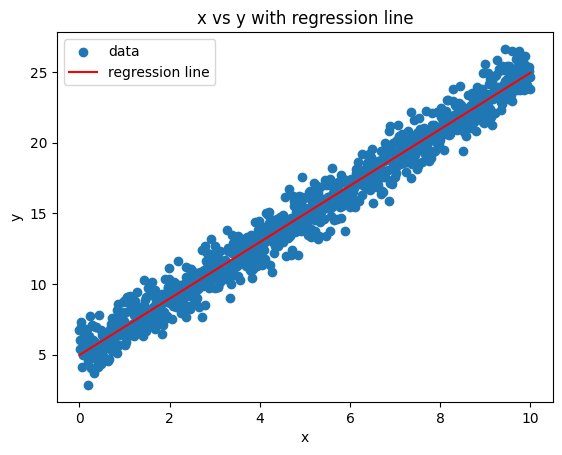

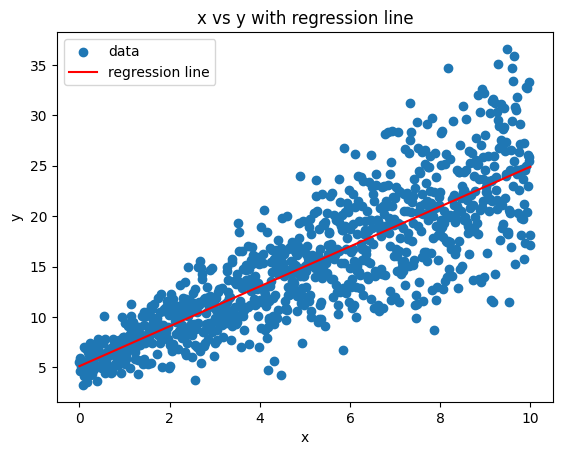

D1 -> slope, intercept, MSE, R2: 1.9981378354156742 4.964054115431438 0.9742055013188605 0.9716075272007758
D2 -> slope, intercept, MSE, R2: 1.9774547886146296 5.120464818401329 13.443572282865233 0.7083499356684422


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def run_regression(df, x_col, y_col):
    X = df[[x_col]].values.reshape(-1,1)
    y = df[y_col].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    slope = model.coef_[0]
    intercept = model.intercept_
    # plot
    plt.scatter(X, y, label='data')
    # line sorted for neat line plot
    xs = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    plt.plot(xs, model.predict(xs), color='red', label='regression line')
    plt.xlabel(x_col); plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col} with regression line')
    plt.legend()
    plt.show()
    return slope, intercept, mse, r2

# Example for D1 (adjust columns if not the first/second)
slope1, intercept1, mse1, r21 = run_regression(d1, d1.columns[0], d1.columns[1])
slope2, intercept2, mse2, r22 = run_regression(d2, d2.columns[0], d2.columns[1])

print("D1 -> slope, intercept, MSE, R2:", slope1, intercept1, mse1, r21)
print("D2 -> slope, intercept, MSE, R2:", slope2, intercept2, mse2, r22)
